In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv(r"C:\Users\PANKAJ MISHRA\Downloads\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['release_year']
Categorical columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


# Numeric columns:release_year
# Categorical columns: show_id, type, title, director, cast, country, date_added, rating, duration, listed_in, description

# we use fillna function to remove the null values of our dataset.

In [5]:
# Before using fillna function
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df=df.fillna("unknown")

In [7]:
# After using fillna function
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df=df.drop_duplicates()

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


# Data Visualization
# It represent the distribution of content over different genres.
* 1.The bars show the top 10 most common genres.
* 2.Dramas, International Movies” is the most common,It the highest number of titles in this combined genre.
* 3.Documentaries and Stand-Up Comedy are also very frequent.
* 4 Genres like Kids’ TV and Family Movies appear less, but still in the top 10.
* 5.It tells you what type of content your dataset is heavy on.

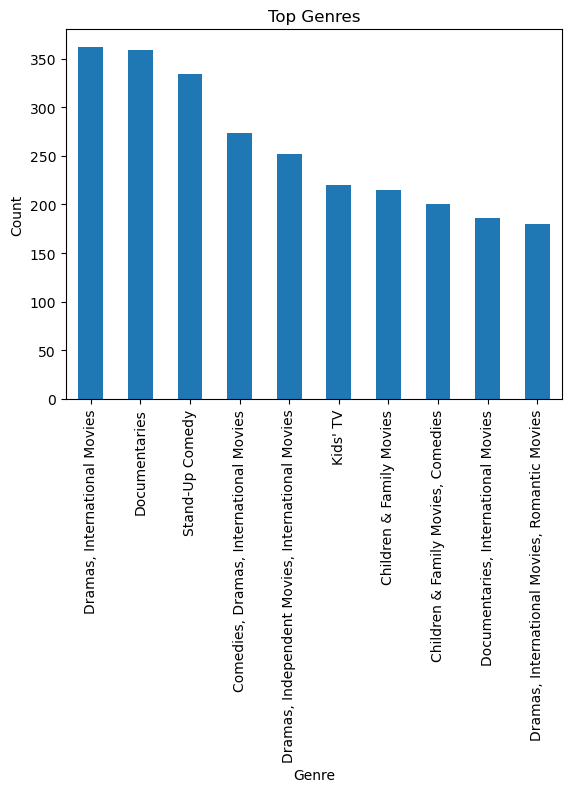

In [10]:
import matplotlib.pyplot as plt

df['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title("Top Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# The distribution of content across release years.
* 1.The line stays almost flat. That means older content  is very limited.
* 2.Slow growth from 1980 to around 2005 Because Content production starts increasing but not very fast.
* 3. we see big jump after 2010,this is where the curve shoots up,it tells Dreaming platforms and digital production increased a lot.

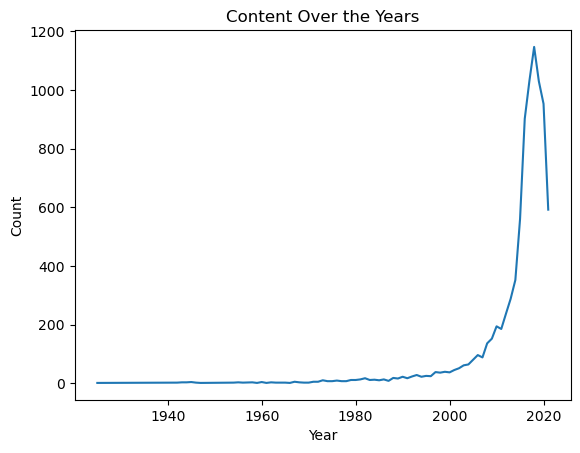

In [11]:
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Content Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# The geographical distribution of content
* There are majorly top three countries Have the Most contribute in the content.
* 1.United States
* 2.India
* 3.United Kingdom    

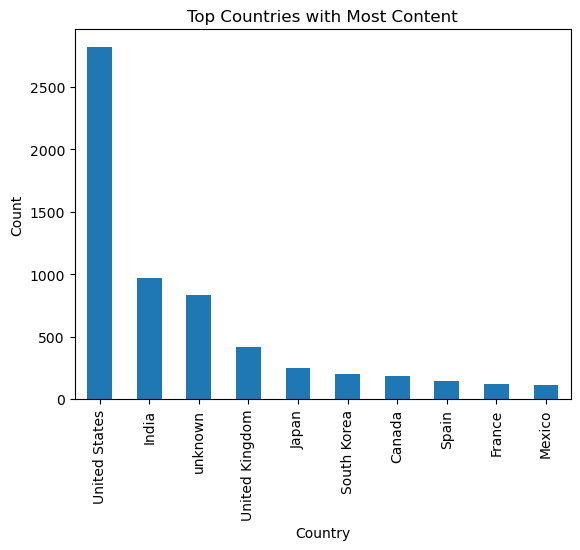

In [12]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top Countries with Most Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

# Time Series Analysis
* Very few titles were added before 2014.
* The rise starts around 2015.
* Huge growth from 2016 to 2019,and the peak was 2019

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


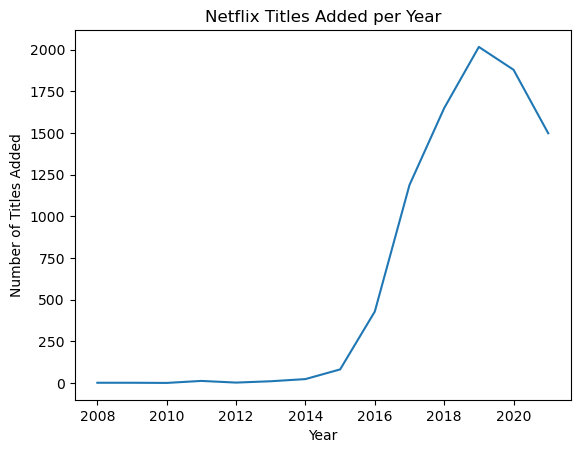

In [13]:
# By year added on Netflix
# Fix date format issues
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Count titles per year
titles_per_year = df['year_added'].value_counts().sort_index()

print(titles_per_year)

# Plot
titles_per_year.plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Netflix Titles Added per Year")
plt.show()

# The distribution of content ratings.
* 1.TV-MA is the most common titles are made for adults.
* 2.TV-14 is the second most common content is suitable for teens and adults.
* 3.Kids’ ratings such as TV-Y, TV-Y7 and TV-G appear but in smaller numbers,it  means children’s content is available but not as much as adult or teen content.
* The chart shows that Netflix has far more adult-oriented and teen-oriented content than kids content.

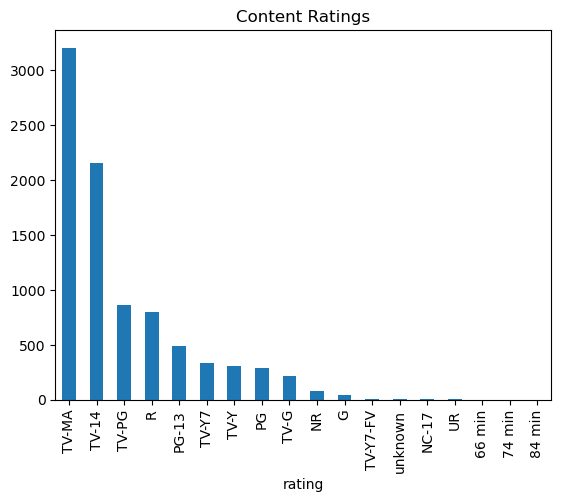

In [14]:
df['rating'].value_counts().plot(kind='bar')
plt.title("Content Ratings")
plt.show()

# The length of movies or episodes
* Season 1 and 2 is most common duration int he daatset.
* Movies also appear in the top list, but they don’t reach the count of TV show durations.
* Short series are more common than long-running ones.

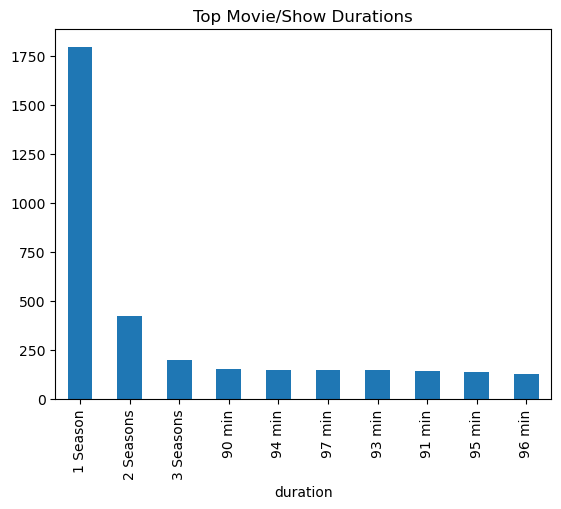

In [15]:
df['duration'].value_counts().head(10).plot(kind='bar')
plt.title("Top Movie/Show Durations")
plt.show()

# Content Ratings Analysis
* TV-MA,TV-14,TV-PG are the most commonrating in data set.
* TV-MA make large portion of the content for mature audiences.
* TV-14 make lot of shows and movies for teens and older viewers.
* TV-PG titles are family -friendly but may need light parental guidance.
* The chart shows that Netflix mainly offers content for mature and teen audiences, while kids’ content makes up a smaller portion.

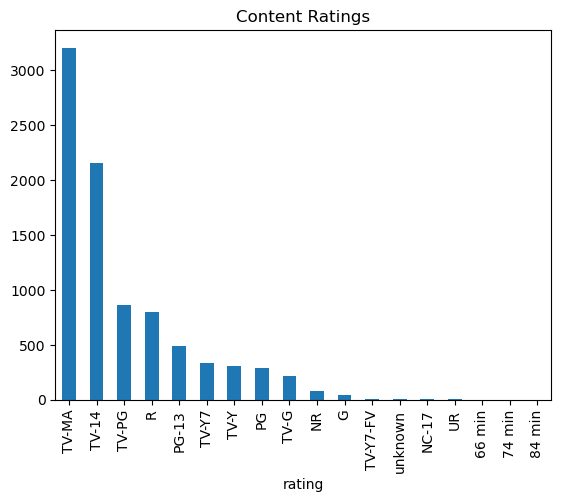

In [16]:
df['rating'].value_counts().plot(kind='bar')
plt.title("Content Ratings")
plt.show()

# Duration Analysis
* Season 1 and 2 is most common duration int he daatset.
* Movies also appear in the top list, but they don’t reach the count of TV show durations.
* Short series are more common than long-running ones.

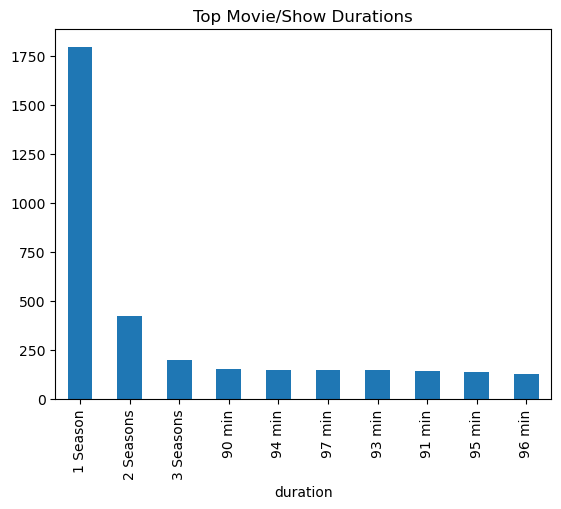

In [17]:
df['duration'].value_counts().head(10).plot(kind='bar')
plt.title("Top Movie/Show Durations")
plt.show()

# Top Lists and Recommendations


In [18]:
df['title'].value_counts().head(10)

title
Zubaan                           1
Dick Johnson Is Dead             1
Blood & Water                    1
Ganglands                        1
Jailbirds New Orleans            1
Kota Factory                     1
Midnight Mass                    1
You Don't Mess with the Zohan    1
You Changed My Life              1
You Carry Me                     1
Name: count, dtype: int64

# Genre Trends Over Time
* The chart shows that the number of genre entries grows strongly as content production increases over time.
* A sharp rise appears after 2010,This is when platforms started producing and releasing a lot more content.
* The trend stays almost flat before the 1980s,Very few titles with genre information were released in the early years.

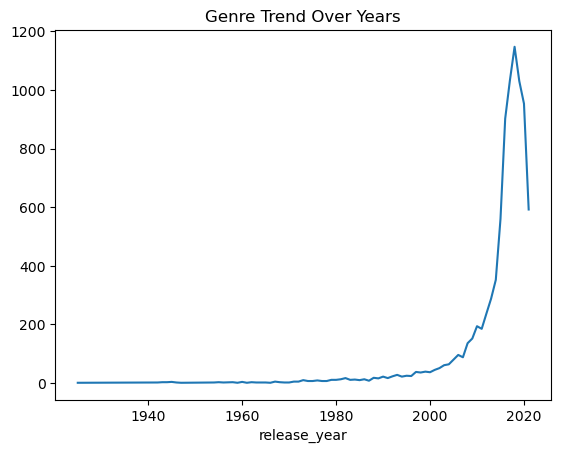

In [19]:
df.groupby('release_year')['listed_in'].count().plot(kind='line')
plt.title("Genre Trend Over Years")
plt.show()

# Geographical Analysis,Distribution of content across countries
* The country like,United States,India and United Kingdom are the most common that share there content on netflix.
* The overall trend shows that English-speaking and Asian entertainment industries dominate the platform.

country
United States     2818
India              972
unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


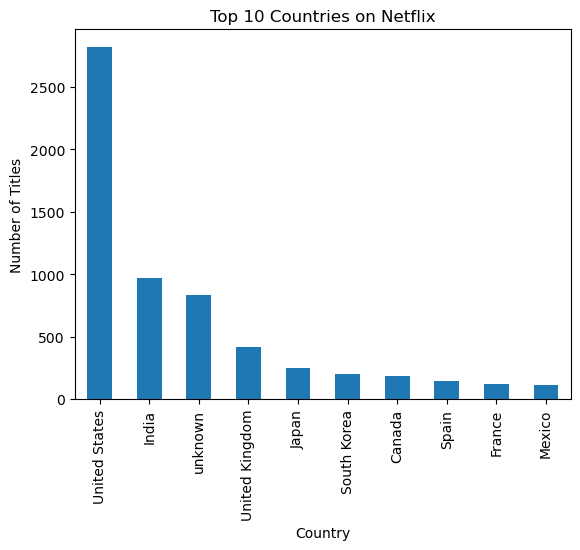

In [20]:
country_counts = df['country'].value_counts().head(10)
print(country_counts)

country_counts.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries on Netflix")
plt.show()

In [21]:
# Correlation Analysis
df.corr(numeric_only=True)

,release_year,year_added
release_year,1.000000,0.111531
year_added,0.111531,1.000000


# user reviews and sentiments & user engagement metrics
# “The dataset does not include user reviews, ratings, view counts, or watch-time information. Because of this, true audience engagement analysis cannot be performed. The Netflix dataset only contains metadata such as title, genre, release year, and description, so engagement-related metrics are not available for analysis.”

# Content Evolution Over Time
# The bars stay very low before the 1980s,but the slow rise start from the 1990s because content output increases but not to fast,A sharp jump appears after 2010 and the biggest growth happens between 2015 and 2020.
# overall the trend matches the global rise of streaming platforms.

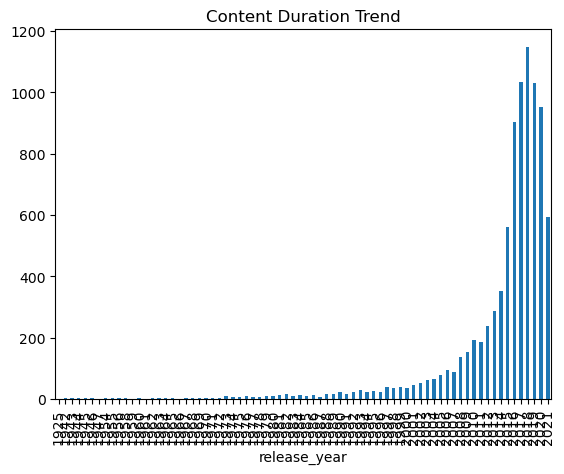

In [26]:
df.groupby('release_year')['duration'].count().plot(kind='bar')
plt.title("Content Duration Trend")
plt.show()

# Language Distribution
# “The given Netflix dataset does not contain any explicit language column.It only has metadata such as title, genre, country, release year, and description text.
# Because of this, a proper language distribution analysis cannot be performed.”

# Content Evolution Over Time

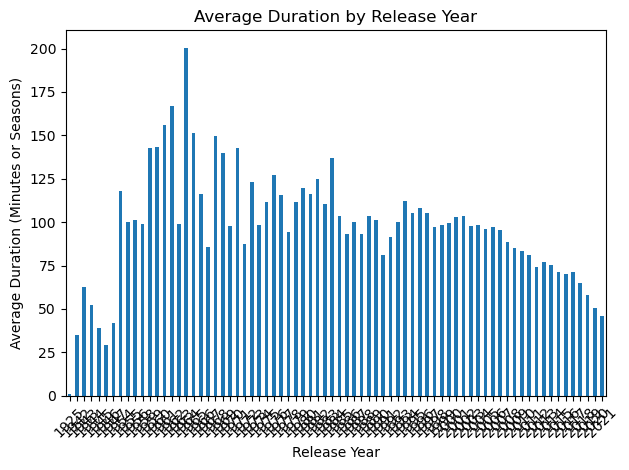

In [37]:
# Extract number from duration
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Group by release year and calculate mean duration
df.groupby('release_year')['duration_num'].mean().plot(kind='bar')

plt.title("Average Duration by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (Minutes or Seasons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Final Conclusion
* Netflix uploads more content after 2015.

* Most content comes from the US and India.

* TV-MA and TV-14 are the most common ratings.

* Drama, Comedy and Documentaries appear most.

* Duration varies widely but 90–120 mins is common for movies.

# Insights

* Netflix’s catalog has grown rapidly after 2015, with a peak around 2019.

* Most content comes from USA, India and UK, showing strong focus on English and Indian entertainment.

* TV-MA and TV-14 are the dominant ratings, so Netflix mainly targets adult and teen audiences.

* Drama, Comedy, International Movies and Documentaries are the most common genres.

* Movies are usually 90–120 minutes long, while TV shows typically have 1–2 seasons.

* Due to missing fields like language and user metrics, the dataset is more useful for catalog analysis than for user behavior analysis.